In [1]:
import pandas as pd
from CFDataFormatter import CFDataFormatter
from Metrics import turn_predictions_into_binaries, plot_multilabel_pr_curve, \
create_classification_report_custom_binary_threshold, plot_and_export_pr_tradeoffs_micro_average
from Models import calculate_and_merge_cf_predictions, grid_search_tune_collaborative_filter
products_and_features_table = pd.read_pickle('raw_data_1728678rows_x_77columns.pkl')
cf_data_formatter = CFDataFormatter(products_and_features_table)

In [2]:
hparams = {"similar_clients":[50,100,500,1000,5000,10000]}
tuning_results = grid_search_tune_collaborative_filter(hparams,cf_data_formatter)
print(tuning_results)

100%|██████████████████████████████████████████| 6/6 [1:08:26<00:00, 684.47s/it]

    hparams    metric
0     (50,)  0.334928
1    (100,)  0.334851
2    (500,)  0.326637
3   (1000,)  0.321958
4   (5000,)  0.321438
5  (10000,)  0.290963


                                 precision    recall  f1-score  support
Asset Management                  0.531532  0.440299  0.481633    134.0
Aval                              0.396000  0.303681  0.343750    326.0
Betriebliche Altersvorsorge       0.585859  0.408451  0.481328    142.0
Bond-Emissionen                   0.250000  0.120000  0.162162     25.0
Bürgschaften und Garantien        0.090323  0.097222  0.093645    144.0
Cash Pooling                      0.300000  0.014778  0.028169    203.0
Commerz Real - Mobilienleasing    0.350515  0.222222  0.272000    153.0
Export Dokumentengeschäft         0.634349  0.544590  0.586052    841.0
Export- und Handelsfinanzierung   0.708333  0.298246  0.419753     57.0
Forderungsmanagement              0.714286  0.185185  0.294118     54.0
Geldmarktkredit                   0.136646  0.094017  0.111392    234.0
Global Payment Plus               0.117476  0.053946  0.073938   2243.0
Import Dokumentengeschäft         0.581818  0.336842  0.426667  

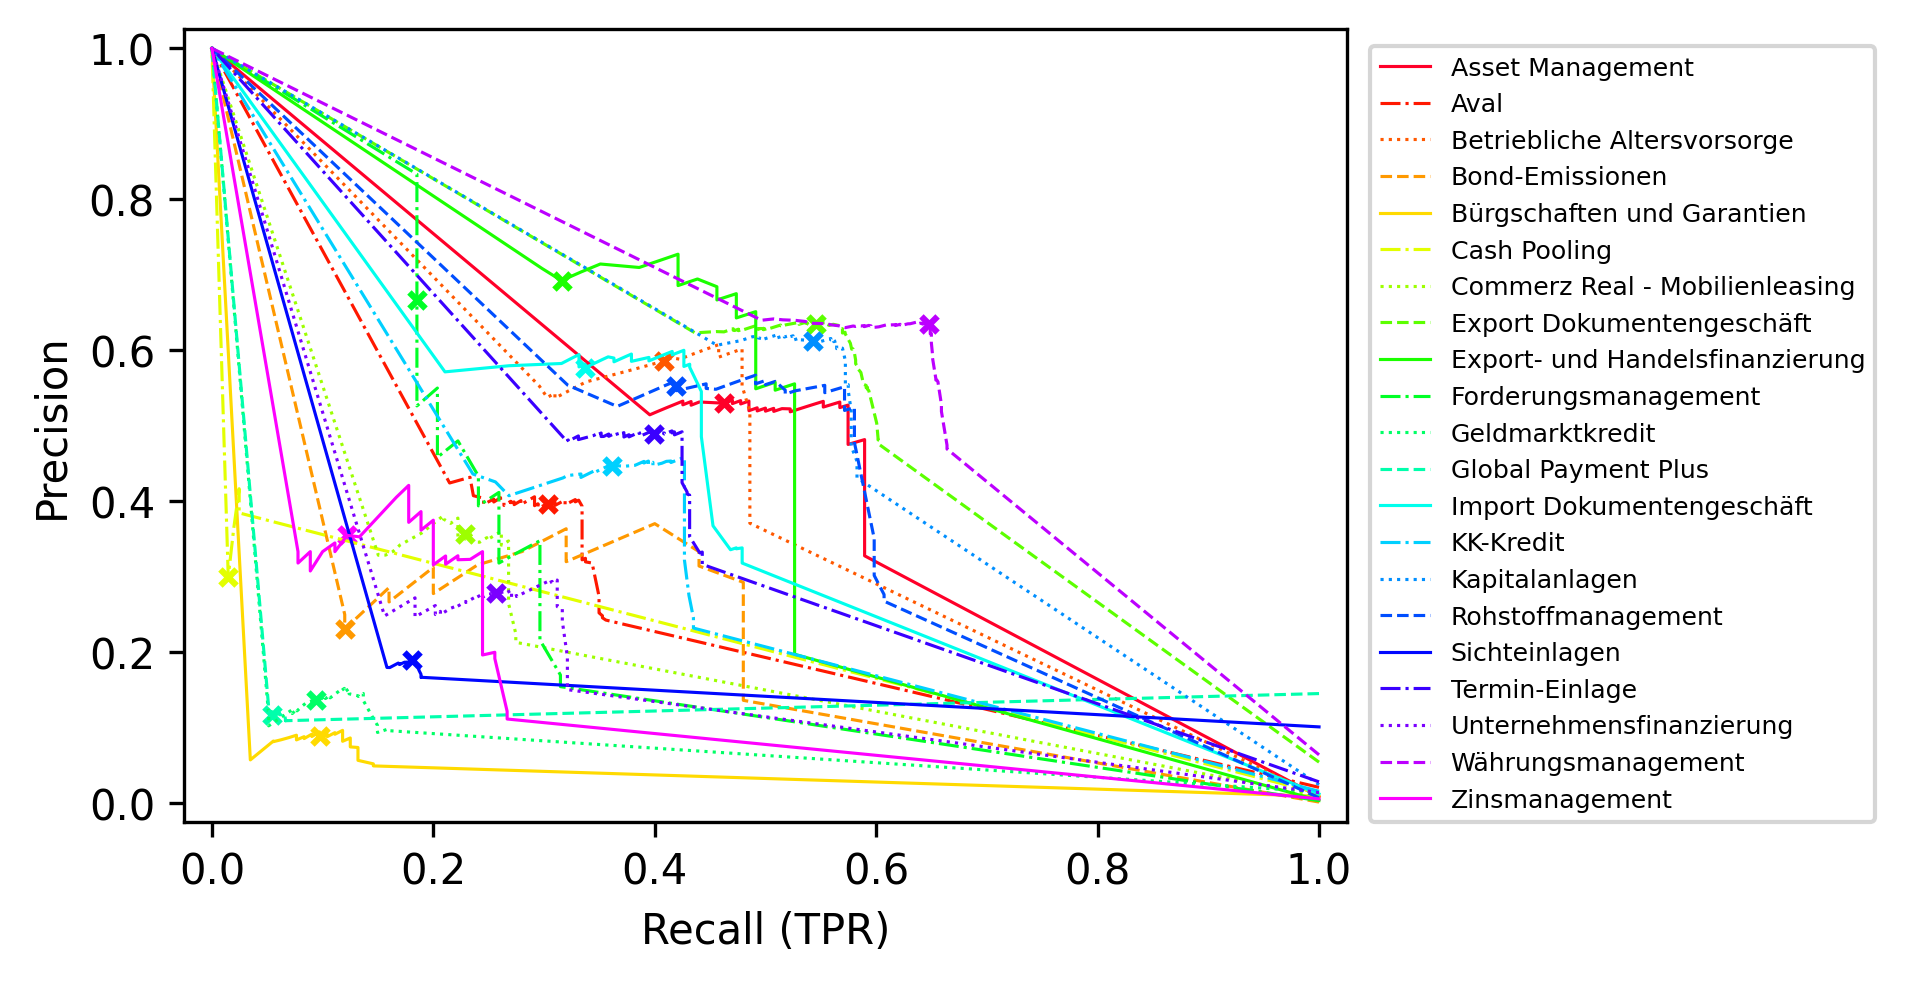

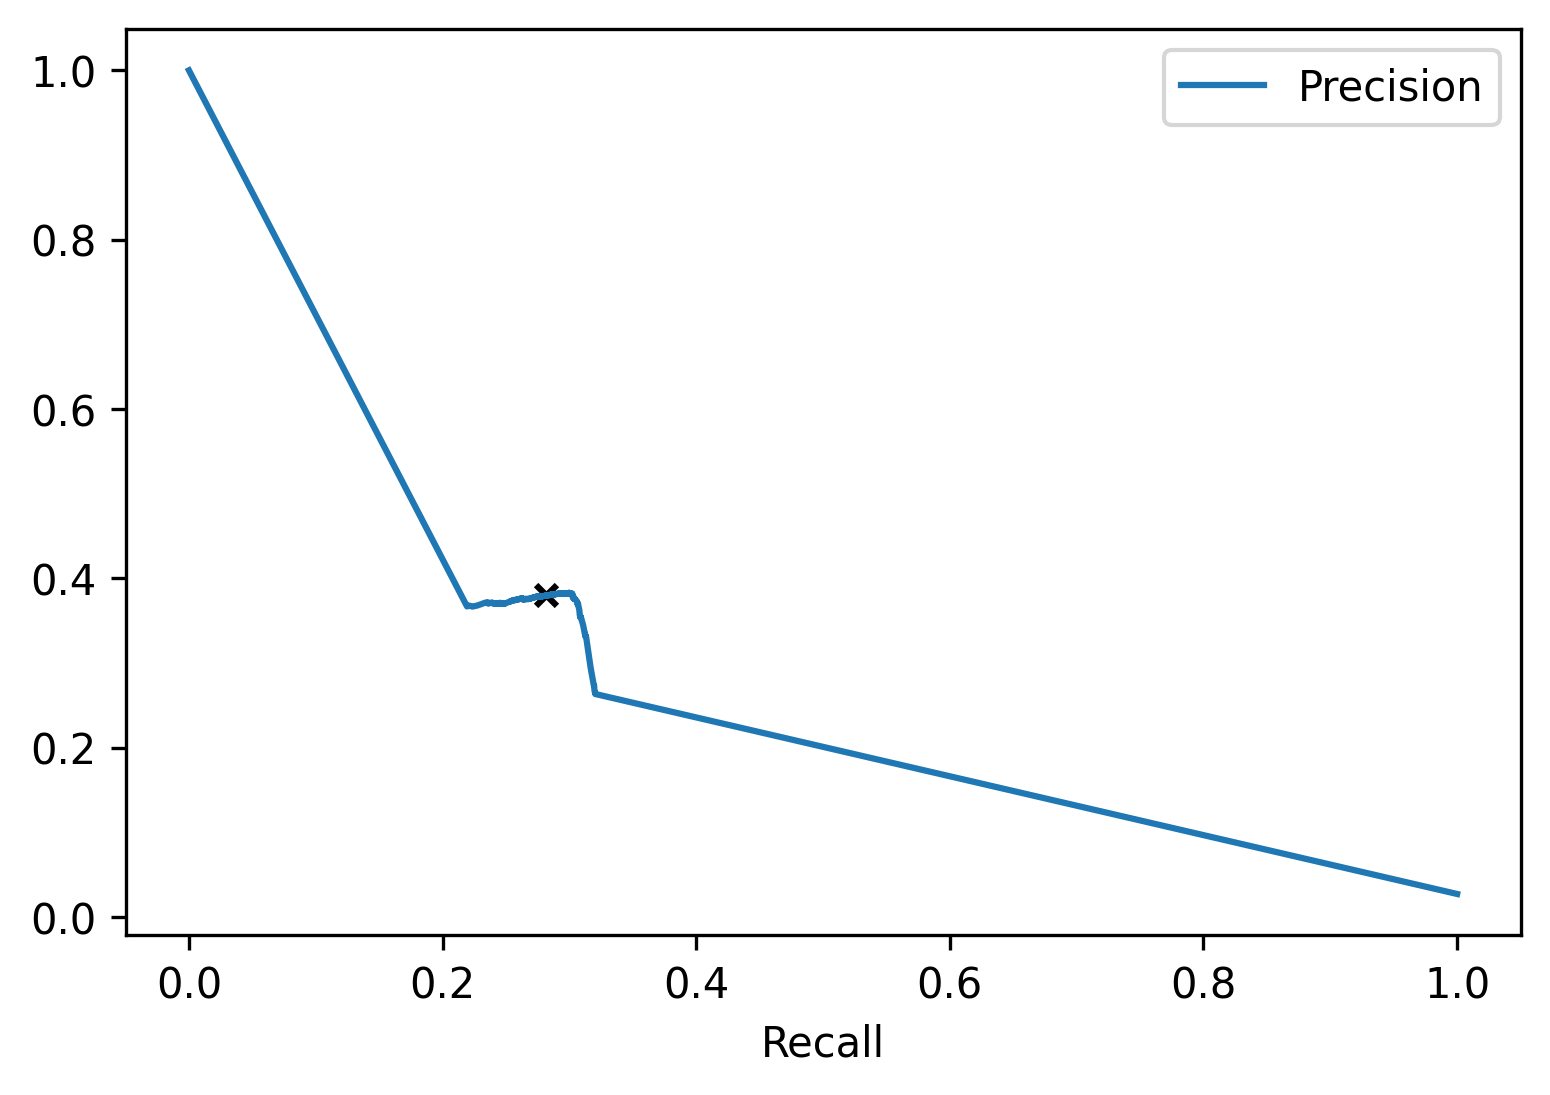

In [3]:
targets = cf_data_formatter.give_merged_targets()
predictions = calculate_and_merge_cf_predictions(cf_data_formatter,tuning_results.loc[0]['hparams'][0])
classification_report = create_classification_report_custom_binary_threshold(
    turn_predictions_into_binaries(predictions.copy(), 0.5).to_numpy(),
    targets.to_numpy(), cf_data_formatter.target_columns)
print(classification_report[["precision","recall","f1-score","support"]])
classification_report.to_pickle("classification_report_netflix_approach.pkl")
plot_multilabel_pr_curve(predictions.to_numpy(),
                         targets.to_numpy(),
                         cf_data_formatter.target_columns,
                         "pr_curve_netflix_approach.png")
plot_and_export_pr_tradeoffs_micro_average(predictions.to_numpy(), targets.to_numpy(),"netflix")